In [1]:
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
        #t
                a = dataset[i:(i+look_back), 0]
                dataX.append(a)
        #t+1
                dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [3]:
numpy.random.seed(7)

In [4]:
dataframe = pd.read_csv('Dataset/AAPL.csv', index_col=0)
dataframe.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,26.927500,26.952499,26.020000,26.427500,24.825821,204702000
2016-11-15,26.642500,26.920000,26.540001,26.777500,25.154610,129058000
2016-11-16,26.674999,27.557501,26.650000,27.497499,25.830971,235362000
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.821573,110528000
2016-11-18,27.430000,27.635000,27.415001,27.514999,25.847408,113715600


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 2016-11-14 to 2020-11-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1+ KB


In [6]:
dataset = dataframe[['Open']] # 1 - 1
dataset = dataset.values.astype('float32')

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [8]:
#split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [9]:
#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
type(trainX)

numpy.ndarray

In [11]:
print(trainX[:5])
print(trainY[:5])

[[0.00256878]
 [0.        ]
 [0.00029293]
 [0.00730075]
 [0.00709796]]
[0.         0.00029293 0.00730075 0.00709796 0.00799929]


In [12]:
print(testX[:5])
print(testY[:5])

[[0.48214254]
 [0.4830213 ]
 [0.44554856]
 [0.47035763]
 [0.48885736]]
[0.4830213  0.44554856 0.47035763 0.48885736 0.48671678]


In [13]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, look_back)))
model.add(Dense(1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,
                    validation_data=(testX, testY),
                    epochs=50,
                    batch_size=128
                   )


Epoch 1/50
7/7 [==============================] - 16s 698ms/step - loss: 0.0328 - val_loss: 0.3268
Epoch 2/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0265 - val_loss: 0.2969
Epoch 3/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0212 - val_loss: 0.2684
Epoch 4/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0167 - val_loss: 0.2417
Epoch 5/50
7/7 [==============================] - 0s 39ms/step - loss: 0.0129 - val_loss: 0.2170
Epoch 6/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0101 - val_loss: 0.1946
Epoch 7/50
7/7 [==============================] - 0s 28ms/step - loss: 0.0080 - val_loss: 0.1751
Epoch 8/50
7/7 [==============================] - 0s 35ms/step - loss: 0.0067 - val_loss: 0.1582
Epoch 9/50
7/7 [==============================] - 0s 47ms/step - loss: 0.0060 - val_loss: 0.1447
Epoch 10/50
7/7 [==============================] - 0s 49ms/step - loss: 0.0056 - val_loss: 0.1341
Epoch 11/50
7/7 [==========

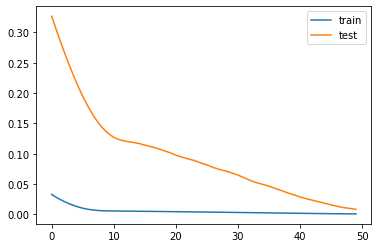

In [17]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

7/7 [==============================] - 0s 3ms/step


In [19]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

In [20]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
trainY[0][:5]

array([26.64249951, 26.67499903, 27.45249934, 27.43000031, 27.53000022])

In [22]:
trainPredict[:5]

array([[32.448944],
       [32.25766 ],
       [32.279457],
       [32.80201 ],
       [32.786858]], dtype=float32)

In [23]:
# calculate root mean squared error
train_rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f RMSE' % (train_rmse))
test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (test_rmse))

Train RMSE: 2.72 RMSE
Test RMSE: 10.03 RMSE


In [24]:
train_mae = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train MAE: %.2f MAE' % (train_mae))
test_mae = mean_absolute_error(testY[0], testPredict[:,0])
print('test MAE: %.2f MAE' % (test_mae))

Train MAE: 2.12 MAE
test MAE: 9.19 MAE


In [25]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

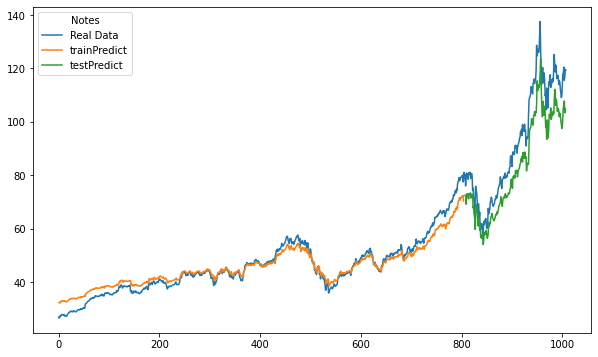

In [26]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()